Bonjour, je confirme. Nous avons estimé l'ilot de chaleur urbain dans le CPRCM AROME (essentiellement un RCM à échelle kilométrique incluant en particulier une représentation réaliste des surfaces urbanisées). Il semble très bien reproduit à Paris par exemple la nuit (tasmin), voir ma présentation de la formation "prise en main des données Métropole". Pour tasmax, il restait des biais avant l'étape d'ajustement statistique. Les fichiers à 2,5 km de résolution devraient permettre de bien identifier les zones urbaines/rurales au moins pour les villes moyennes à grosses. Je confirme aussi que la variable rsdsAdjust doit permettre d'identifier les jours bien ensoleillés en travaillant par exemple en écart à une climatologie de rsdsAdjust. Je n'étais pas dans le projet MApUCE mais je pense que la méthodo est ré-applicable.


Données à utiliser

## Settings

In [1]:
from pathlib import Path
import pandas as pd
import requests
import xarray as xr

DATA_FOLDER = Path(r"C:\Users\Utilisateur\Documents\HAI\06_hackathon_meteo_france\data")


## Download data

In [2]:

base_url = "https://object.files.data.gouv.fr/meteofrance-drias/SocleM-Climat-2025" 
type_downscaling = "CPRCM"
zone = "METROPOLE"
domain = "ALPX-3"
gcm = "CNRM-ESM2-1"
member = "r1i1p1f2"
rcm = "CNRM-AROME46t1"
ssp = "ssp370"
timestep = "day"
variable = "tasAdjust"
version = "version-hackathon-102025"


for variable in ["tasAdjust", "tasminAdjust", "tasmaxAdjust"]:
    for year1,year2 in [(2015, 2019), (2100,2100)] + [(y*10, y*10+9) for y in range(202, 210)]:
        filename = f"{variable}_FR-Metro_{gcm}_{ssp}_{member}_CNRM-MF_{rcm}_v1-r1_MF-CDFt-ANASTASIA-{domain}-1991-2020_day_{year1}0101-{year2}1231.nc"
        url = f"{base_url}/{type_downscaling}/{zone}/{domain}/{gcm}/{member}/{rcm}/{ssp}/{timestep}/{variable}/{version}/{filename}"
        
        output_path = DATA_FOLDER / "climate_data" / filename

        if not output_path.exists():
            r = requests.get(url)
            with open(output_path, 'wb') as f:
                for chunk in r.iter_content(chunk_size=8192):
                    f.write(chunk)


"CNRM-ESM2-1" ssp370  r1i1p1f2 CNRM-AROME46t1

scenario +2 2052 [2042, 2061]
scenario +2,7 2078 [2069, 2088]


# preparation des donnnées 

- scenario 1,7/1,9 [2015, 2035]

- scenario +2 2052 [2042, 2061]

- scenario +2,7 2078 [2069, 2088]


QUestion:
- quel trajectoire pour 

In [3]:

scenario_years = {
    2: (2042, 2061),
    2.7: (2068, 2087),
}
scenario_data = {
    2: {
        "min": [
            "tasminAdjust_FR-Metro_CNRM-ESM2-1_ssp370_r1i1p1f2_CNRM-MF_CNRM-AROME46t1_v1-r1_MF-CDFt-ANASTASIA-ALPX-3-1991-2020_day_20400101-20491231.nc",
            "tasminAdjust_FR-Metro_CNRM-ESM2-1_ssp370_r1i1p1f2_CNRM-MF_CNRM-AROME46t1_v1-r1_MF-CDFt-ANASTASIA-ALPX-3-1991-2020_day_20500101-20591231.nc",
            "tasminAdjust_FR-Metro_CNRM-ESM2-1_ssp370_r1i1p1f2_CNRM-MF_CNRM-AROME46t1_v1-r1_MF-CDFt-ANASTASIA-ALPX-3-1991-2020_day_20600101-20691231.nc"
        ],
        "max": [
            "tasmaxAdjust_FR-Metro_CNRM-ESM2-1_ssp370_r1i1p1f2_CNRM-MF_CNRM-AROME46t1_v1-r1_MF-CDFt-ANASTASIA-ALPX-3-1991-2020_day_20400101-20491231.nc",
            "tasmaxAdjust_FR-Metro_CNRM-ESM2-1_ssp370_r1i1p1f2_CNRM-MF_CNRM-AROME46t1_v1-r1_MF-CDFt-ANASTASIA-ALPX-3-1991-2020_day_20500101-20591231.nc",
            "tasmaxAdjust_FR-Metro_CNRM-ESM2-1_ssp370_r1i1p1f2_CNRM-MF_CNRM-AROME46t1_v1-r1_MF-CDFt-ANASTASIA-ALPX-3-1991-2020_day_20600101-20691231.nc"
        ]
    },
    2.7: {
        "min": [
            "tasminAdjust_FR-Metro_CNRM-ESM2-1_ssp370_r1i1p1f2_CNRM-MF_CNRM-AROME46t1_v1-r1_MF-CDFt-ANASTASIA-ALPX-3-1991-2020_day_20600101-20691231.nc",
            "tasminAdjust_FR-Metro_CNRM-ESM2-1_ssp370_r1i1p1f2_CNRM-MF_CNRM-AROME46t1_v1-r1_MF-CDFt-ANASTASIA-ALPX-3-1991-2020_day_20700101-20791231.nc",
            "tasminAdjust_FR-Metro_CNRM-ESM2-1_ssp370_r1i1p1f2_CNRM-MF_CNRM-AROME46t1_v1-r1_MF-CDFt-ANASTASIA-ALPX-3-1991-2020_day_20800101-20891231.nc"
        ],
        "max": [
            "tasmaxAdjust_FR-Metro_CNRM-ESM2-1_ssp370_r1i1p1f2_CNRM-MF_CNRM-AROME46t1_v1-r1_MF-CDFt-ANASTASIA-ALPX-3-1991-2020_day_20600101-20691231.nc",
            "tasmaxAdjust_FR-Metro_CNRM-ESM2-1_ssp370_r1i1p1f2_CNRM-MF_CNRM-AROME46t1_v1-r1_MF-CDFt-ANASTASIA-ALPX-3-1991-2020_day_20700101-20791231.nc",
            "tasmaxAdjust_FR-Metro_CNRM-ESM2-1_ssp370_r1i1p1f2_CNRM-MF_CNRM-AROME46t1_v1-r1_MF-CDFt-ANASTASIA-ALPX-3-1991-2020_day_20800101-20891231.nc"
        ]
    }
}

In [4]:
def return_tropical_nights(
    data,
    threshold
):
    return (data["tasminAdjust"] > threshold+273.15).groupby('time.year').sum(dim='time').rename({'year': 'time'})


def return_threshold_waves(
    threshold,
    data,
    variable_name,
):  
    all_years = []
    for year in set(data.time.dt.year.values):
        data_year = data.sel(time=data.time.dt.year == year)
        # Condition binaire jour chaud
        hot = data_year[variable_name] > threshold +273.15
        
        # Rolling sur 3 jours pour détecter les séquences de ≥ 3 jours chauds
        rolling_hot = hot.rolling(time=3, center=False).sum()
        
        stacked = xr.concat(
            [
                rolling_hot==3,              # shift 0 = aujourd'hui
                rolling_hot.shift(time=-1) ==3,# shift 1 = hier
                rolling_hot.shift(time=-2)==3 # shift 2 = avant-hier
            ],
            dim="window"
        )
        
        # Heatwave = 3 jours consécutifs chauds
        heatwave_days = stacked.any(dim="window")
        all_years.append(heatwave_days.sum(dim='time'))
    return xr.concat(
            all_years,
            dim="time"
        )

def return_heatwaves(
    data_min,
    data_max,
    threshold_min,
    threshold_max
):  
    all_years = []
    for year in set(data_min.time.dt.year.values):
        data_year = xr.merge(
            [
                data_min.sel(time=data_min.time.dt.year == year),
                data_max.sel(time=data_max.time.dt.year == year)
            ], 
            join="outer"
        )
        # Condition binaire jour chaud
        hot = (data_year["tasminAdjust"] > threshold_min + 273.15) * (data_year["tasmaxAdjust"] > threshold_max + 273.15)
        
        # Rolling sur 3 jours pour détecter les séquences de ≥ 3 jours chauds
        rolling_hot = hot.rolling(time=3, center=False).sum()
        
        stacked = xr.concat(
            [
                rolling_hot==3,              # shift 0 = aujourd'hui
                rolling_hot.shift(time=-1) ==3,# shift 1 = hier
                rolling_hot.shift(time=-2)==3 # shift 2 = avant-hier
            ],
            dim="window"
        )
        
        # Heatwave = 3 jours consécutifs chauds
        heatwave_days = stacked.any(dim="window")
        all_years.append(heatwave_days.sum(dim='time'))
    return xr.concat(
            all_years,
            dim="time"
        )

In [5]:

for scenario, variable_data in scenario_data.items():
    all_tropical_nights = []
    all_heatwaves = []

    all_indicators = {}

    # loop over all file for each scenario
    for path_data_min, path_data_max in zip(variable_data["min"], variable_data["max"]):
        # read data
        data_min =  xr.open_dataset( DATA_FOLDER / "climate_data" / path_data_min)
        data_min = data_min.sel(time=slice(f'{scenario_years[scenario][0]}-04-01', f'{scenario_years[scenario][1]}-10-31'))
        data_max =  xr.open_dataset( DATA_FOLDER / "climate_data" / path_data_max)
        data_max = data_max.sel(time=slice(f'{scenario_years[scenario][0]}-04-01', f'{scenario_years[scenario][1]}-10-31'))

        for threshold in [20, 25]:
            tropical_nights = return_tropical_nights(
                data=data_min,
                threshold=threshold
            )
            tropical_nights.name = f"n_tropical_nights_min{threshold}"
            all_indicators.setdefault(f"n_tropical_nights_min{threshold}", []).append(tropical_nights)
        
        heatwaves_max35 = return_threshold_waves(
            threshold=35,
            data=data_max,
            variable_name="tasmaxAdjust",
        )
        heatwaves_max35.name = "n_heatwaves_days_max35"
        all_indicators.setdefault("n_heatwaves_days_max35", []).append(heatwaves_max35)

        
        for threshold in [20, 25]:
            heatwaves_min = return_threshold_waves(
                threshold=threshold,
                data=data_min,
                variable_name="tasminAdjust",
            )
            heatwaves_min.name = f"n_heatwaves_days_min{threshold}"
            all_indicators.setdefault(f"n_heatwaves_days_min{threshold}", []).append(heatwaves_min)

        for threshold_min in [20,25]:
            heatwave_minx_maxy = return_heatwaves(
                data_min,
                data_max,
                threshold_min=threshold_min,
                threshold_max=35
            )
            heatwave_minx_maxy.name = f"n_heatwaves_days_min{threshold_min}_max35"
            all_indicators.setdefault(f"n_heatwaves_days_min{threshold_min}_max35", []).append(heatwave_minx_maxy)

    all_indicators_max = {} 
    for key, yearly_values in all_indicators.items():
        all_indicators_max[key] = xr.concat(
            yearly_values,
            dim="time"
        ).max(dim="time")

    final_data = xr.merge(list(all_indicators_max.values())).to_netcdf(
        DATA_FOLDER / "clean_output" / f"scenario_{scenario}.nc"
    )

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_7112\1793088243.py:47: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.
  data_year = xr.merge(
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_7112\1793088243.py:47: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.
  data_year = xr.merge(
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_7112

In [42]:
del ds

In [35]:
import matplotlib.pyplot as plt

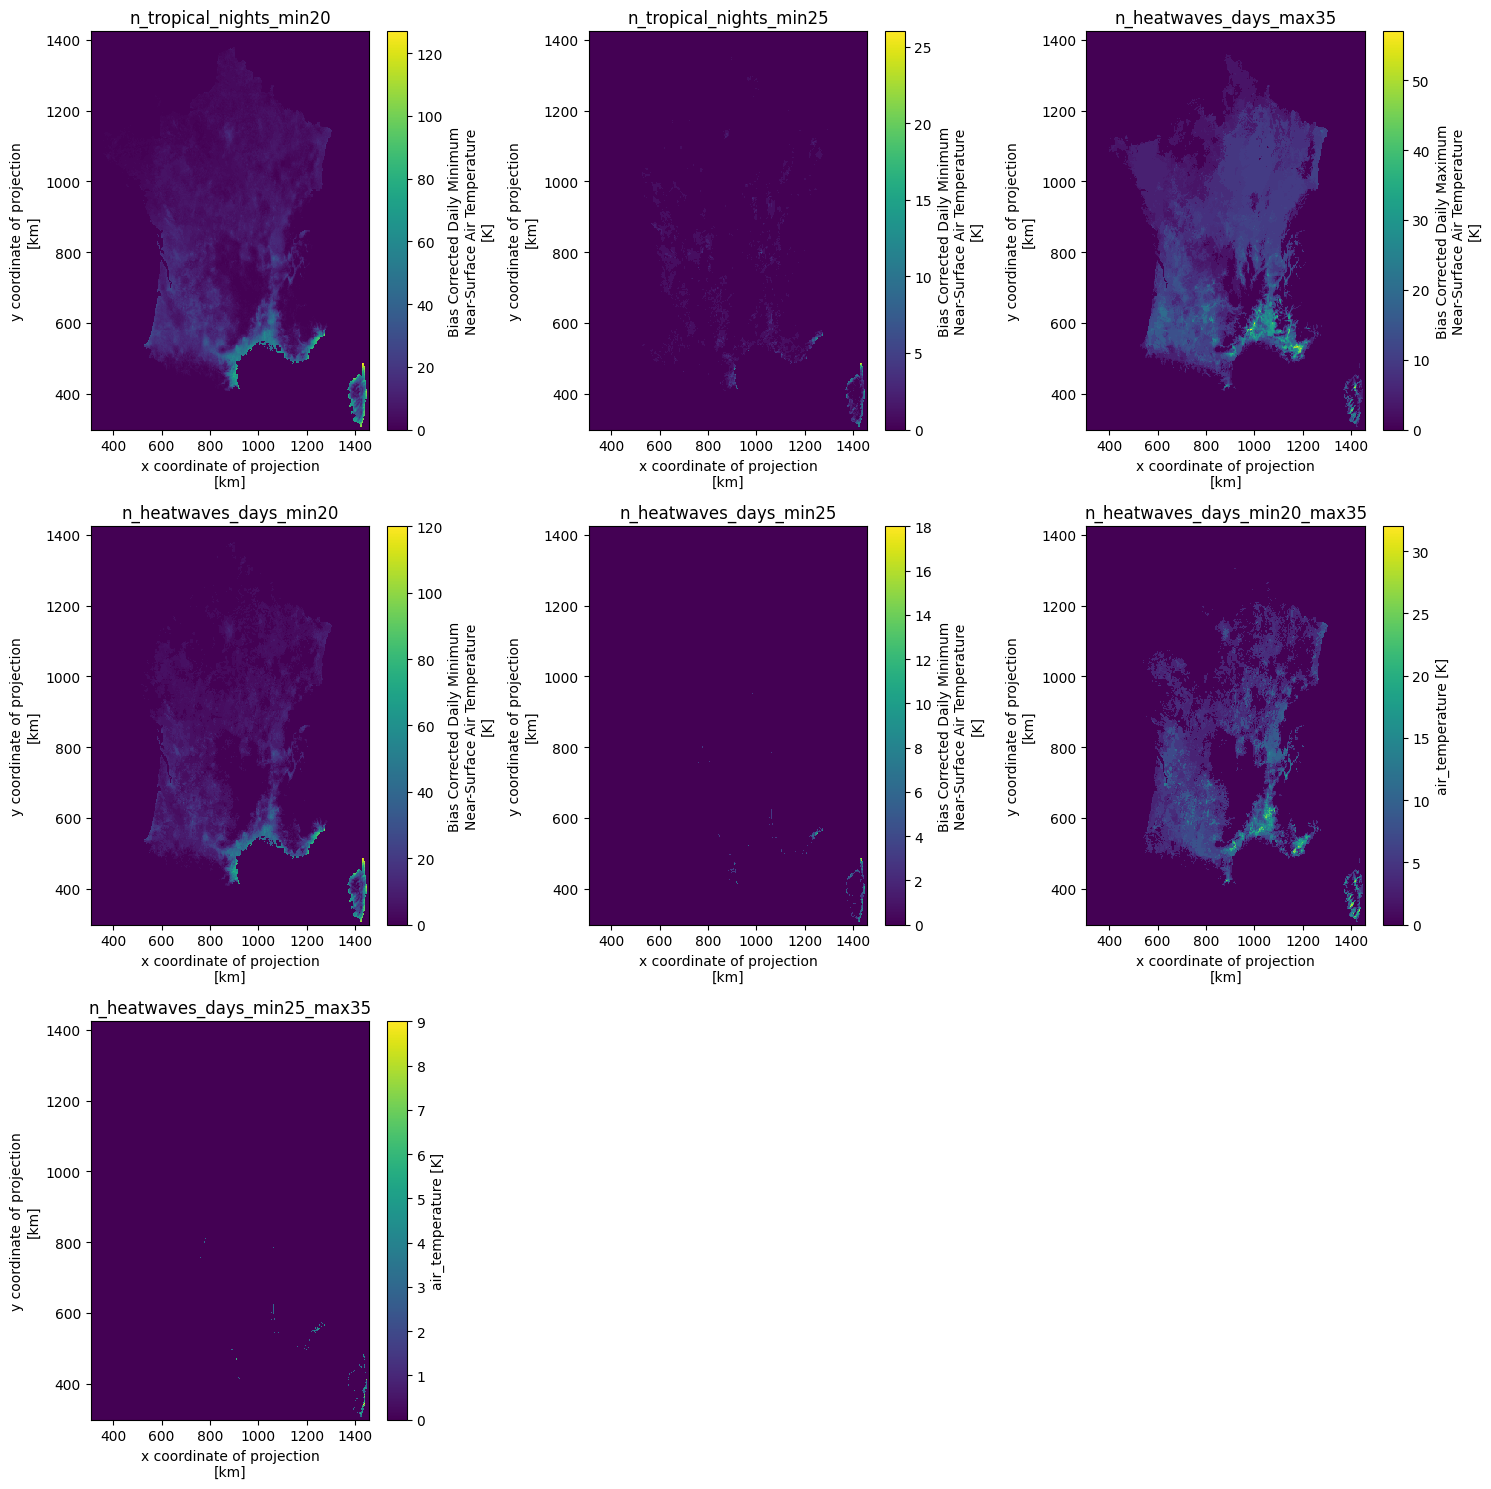

In [36]:
# Get list of data variables (excluding coordinates)
data_vars = list(ds.data_vars)

# Create subplots - one for each variable
n_vars = len(data_vars)
n_cols = 3  # Number of columns in subplot grid
n_rows = (n_vars + n_cols - 1) // n_cols  # Calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten() if n_vars > 1 else [axes]

# Plot each variable
for i, var in enumerate(data_vars):
    ds[var].plot(ax=axes[i])
    axes[i].set_title(var)

# Hide empty subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

    xr.concat(
        all_heatwave_min20_max35,
        dim="time"
    ).max(dim="time")
    tropical_nights_min20_max = xr.concat(
        all_tropical_nights_min20,
        dim="time"
    ).max(dim="time")

In [176]:
df =  xr.open_dataset(DATA_FOLDER / "clean_output" / "scenario_2.7.nc")
df.to_dataframe().to_csv(DATA_FOLDER / "clean_output" / "scenario_2.7.csv")

n_heatwave_min20_max35  n_tropical_nights_min20      lon  \
y      x                                                                  
300.0  307.5                        0                        0  -4.1256   
       310.0                        0                        0  -4.0961   
       312.5                        0                        0  -4.0666   
       315.0                        0                        0  -4.0371   
       317.5                        0                        0  -4.0076   
...                               ...                      ...      ...   
1422.5 1447.5                       0                        0  10.3995   
       1450.0                       0                        0  10.4353   
       1452.5                       0                        0  10.4711   
       1455.0                       0                        0  10.5068   
       1457.5                       0                        0  10.5426   

                  lat  
y      x               
300.0  307.5   41.038  
       310.0   41.041  
       312.5   41.044  
       315.0   41.046  
       317.5   41.048  
...               ...  
1422.5 1447.5  51.375  
       1450.0  51.373  
       1452.5  51.372  
       1455.0  51.370  
       1457.5  51.368  

[207450 rows x 4 columns]

In [163]:

all_tropical_nights[0] = all_tropical_nights[0].rename({"year": "time"})

In [164]:
hh = all_heatwaves[0].max(dim="time")
tropical_nights =  all_tropical_nights[0].max(dim="time")

In [78]:
ds_period = xr.open_dataset(
    DATA_FOLDER / "climate_data" / "tasmaxAdjust_FR-Metro_CNRM-ESM2-1_ssp370_r1i1p1f2_CNRM-MF_CNRM-AROME46t1_v1-r1_MF-CDFt-ANASTASIA-ALPX-3-1991-2020_day_20500101-20591231.nc"
)

## Vagues de chaleurs

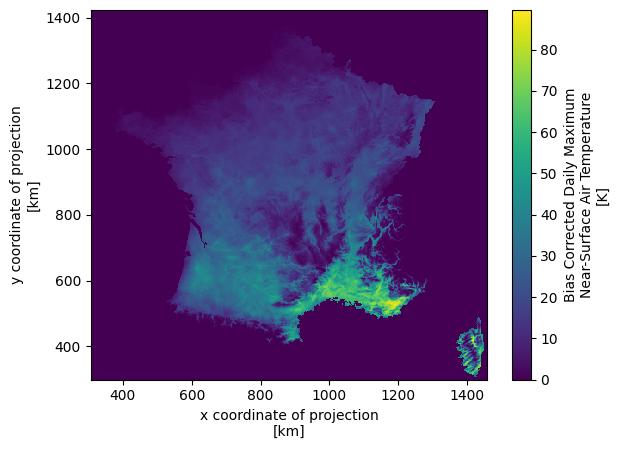

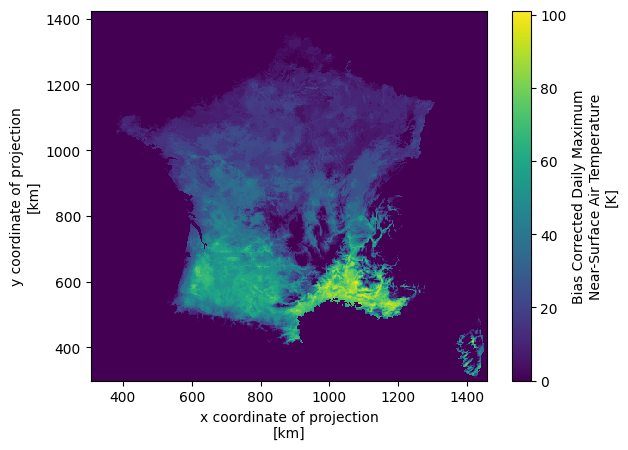

In [71]:
heatwave_days.sum("time").plot()

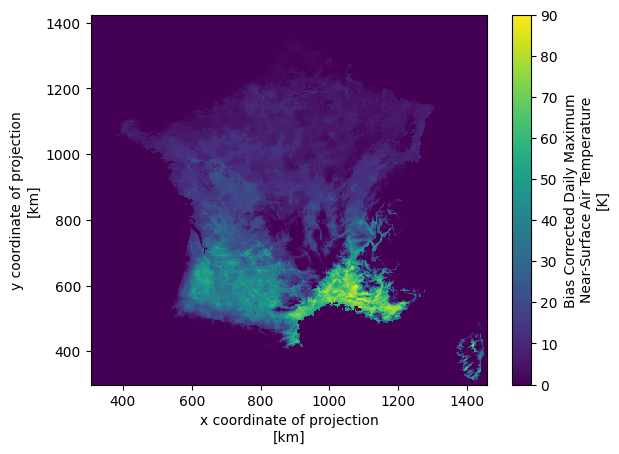

In [61]:
heatwave_days.sum("time").plot()